In [2]:
import aircv as ac
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [77]:
from PIL import Image

In [3]:

path = r'light/'
pic1 = ac.imread(path+'1636509872540.JPEG')
pic1_cut = pic1[int(pic1.shape[0]*0):int(pic1.shape[0]*0.4), :]

In [137]:
# pic4 = ac.imread(path+'1636510489005.JPEG')
# pic4_cut = pic4[int(pic4.shape[0]*0):int(pic4.shape[0]*0.4), :]
1636509902351
pic4 = ac.imread(path+'1636509902351.JPEG')
pic4_re = cv2.resize(pic4, None, fx=0.9, fy=0.9)

In [5]:
pic3 = ac.imread(path+'1636511737363.JPEG')

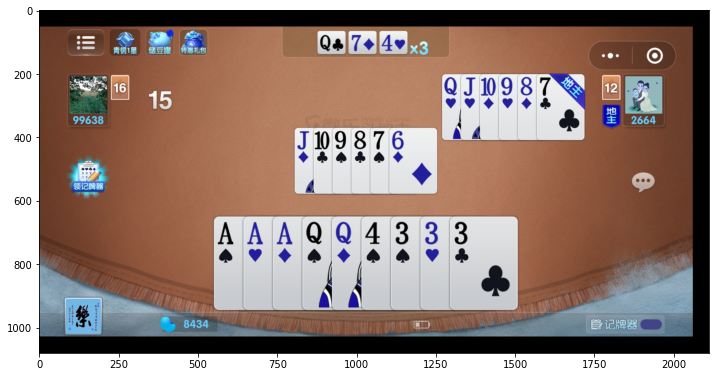

In [6]:

plt.figure(figsize=(12, 12))
plt.imshow(pic4)



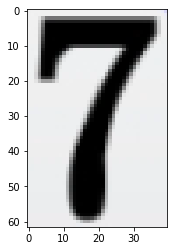

In [101]:
x = slice(210, 272)
i = 21
y1 = 358 + 58 * i
y2 = 348 + 50 + 58 * i
num = pic4[x, y1:y2]
plt.imshow(num)
# cv2.imwrite('light_template/b4.png', num)


In [ ]:
# bk = pic1[210:272, 348:392]
# plt.imshow(bk)
# cv2.imwrite('light/bk.png', bk)

In [ ]:
picq = pic1[210:272, 406:450]
plt.imshow(picq)

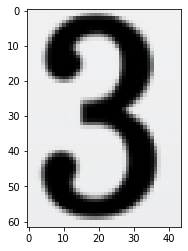

In [43]:
pica = pic3[210:272, 406:450]
plt.imshow(pica)


In [167]:
ls = ac.find_all_sift(pic1, num)

(4, 1, 2) (3, 3) float32 float64


In [168]:
ls

[{'result': (425.5, 335.5),
  'rectangle': [(401, 305), (400, 366), (450, 366), (449, 305)],
  'confidence': (17, 29)}]

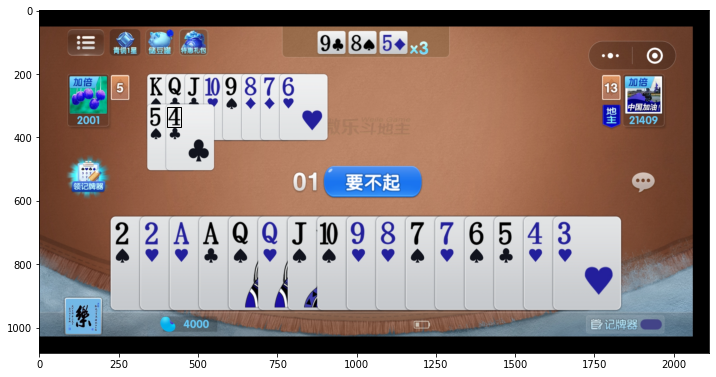

In [166]:
fig = plt.figure(figsize=(12, 12))
plt.imshow(pic1)
plt.gca().add_patch(
    patches.Rectangle(ls[0]['rectangle'][0], 44, 62, fill=False)

)

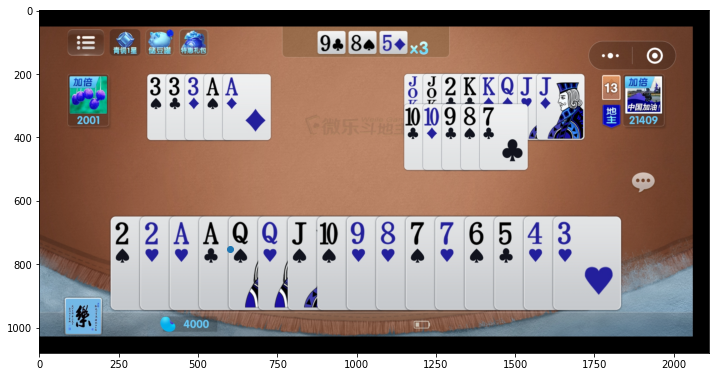

In [36]:
plt.figure(figsize=(12, 12))
plt.imshow(pic3)
for p in ls:
    p = p['result']
    plt.scatter(p[0], p[1])

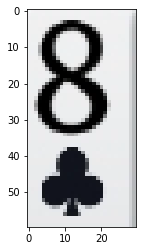

In [116]:
plt.imshow(pic1[935:995, 775:805])

In [126]:
cv2.imwrite('E:/LuneZ99/aircv/HJ.png', picq)

True

In [194]:
{
    'prev': ['CJ', 'DT', 'C9', 'C8', 'H7', 'C6', 'S5'],
    'self': [],
    'next': ['SQ', 'HJ', 'CT', 'H9', 'S8', 'S7', 'H6'],
    'landlord': ['S2', 'CT', 'H6']
}

{'prev': ['CJ', 'DT', 'C9', 'C8', 'H7', 'C6', 'S5'],
 'self': [],
 'next': ['SQ', 'HJ', 'CT', 'H9', 'S8', 'S7', 'H6'],
 'landlord': ['S2', 'CT', 'H6']}

In [28]:
pic4_cut = pic4[108:432, 1056:2112]

In [47]:
def dhash(image):
    # 将图片转化为8*8
    image = cv2.resize(image, (9, 8), interpolation=cv2.INTER_CUBIC)
    # 将图片转化为灰度图
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    dhash_str = ''
    for i in range(8):
        for j in range(8):
            if gray[i, j] > gray[i, j + 1]:
                dhash_str = dhash_str + '1'
            else:
                dhash_str = dhash_str + '0'
    result = ''
    for i in range(0, 64, 4):
        result += ''.join('%x' % int(dhash_str[i: i + 4], 2))
    # print("dhash值",result)
    return result

In [78]:
import numpy as np

def hist_similar(lh, rh):
    assert len(lh) == len(rh)
    hist = sum(1 - (0 if l == r else float(abs(l - r)) / max(l, r)) for l, r in zip(lh, rh)) / len(lh)
    return hist

def calc_similar(li, ri):
    li = Image.fromarray(li)
    ri = Image.fromarray(ri)
    calc_sim = hist_similar(li.histogram(), ri.histogram())
    return calc_sim

In [144]:
temps = {}


def read_temp(pa='light_template/'):
    for p in os.listdir(pa):
        if p.endswith('png'):
            temps[p.split('.')[0]] = ac.imread(pa+p)

read_temp()

In [125]:
def _find_single(pi, temp):
    results = ac.find_all_template(pi, temp, threshold=0.95)
    if len(results) > 0:
        return [res for res in results if res['confidence'] > 0.95]
        # return [res for res in results if res['confidence'][0] / res['confidence'][1] > 1/2]
        # return results
    else:
        return []

In [138]:
ou = []

def _find(x0, x1, y0, y1):
    x0 = int(x0*pic4.shape[0])
    x1 = int(x1*pic4.shape[0])
    y0 = int(y0*pic4.shape[1])
    y1 = int(y1*pic4.shape[1])
    plt.imshow(pic4[x0:x1, y0:y1])
    for name, temp in temps.items():
        ress = _find_single(pic4[x0:x1, y0:y1], temp)
        if len(ress) == 0:
            continue
        # print(name, ress)
        res = ress[0]
        fi = pic4[x0:x1, y0:y1][int(res['result'][1]-31):int(res['result'][1]+31),
             int(res['result'][0]-25):int(res['result'][0]+25)
             ]
        if fi.shape != (62, 50, 3):
            continue
        # print(fi.shape)

        print(name, calc_similar(fi, temp))
        # plt.gca().add_patch(
        #     patches.Rectangle((1107, 381), 50, 62, fill=False)
        # )
        ou.extend([name]*len(ress))

In [112]:
ls = _find_single(pic4, num)

b6 0.6155953783858646


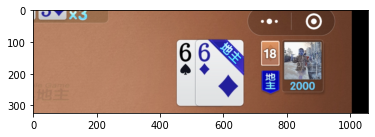

In [145]:
ou = []
_find(0.1, 0.4, 0.5, 1)

In [146]:
ou

['b6', 'b6']

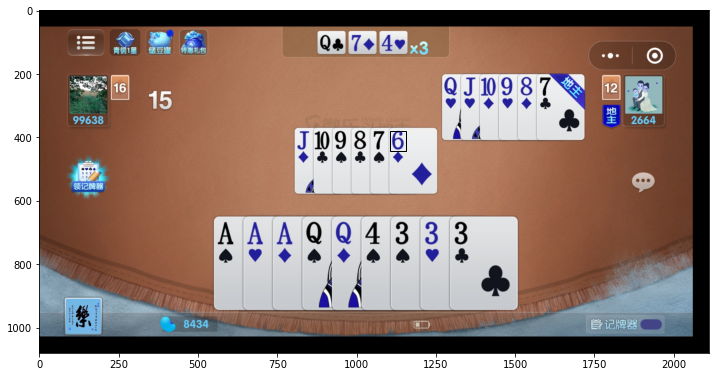

In [42]:
fig = plt.figure(figsize=(12, 12))
plt.imshow(pic4)
plt.gca().add_patch(
    patches.Rectangle((1107, 381), 50, 62, fill=False)

)

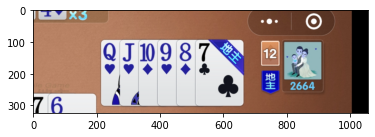

In [30]:
plt.imshow(pic4_cut)

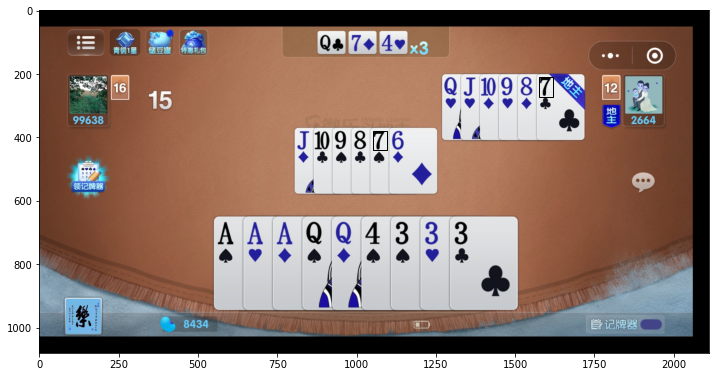

In [116]:
fig = plt.figure(figsize=(12, 12))
plt.imshow(pic4)
plt.gca().add_patch(
    patches.Rectangle(ls[0]['rectangle'][0], 44, 62, fill=False),

)
plt.gca().add_patch(
    patches.Rectangle(ls[1]['rectangle'][0], 44, 62, fill=False),

)

In [114]:
ls

[{'result': (1596.0, 241.0),
  'rectangle': ((1576, 210), (1576, 272), (1616, 210), (1616, 272)),
  'confidence': 0.9999998211860657},
 {'result': (1072.0, 410.0),
  'rectangle': ((1052, 379), (1052, 441), (1092, 379), (1092, 441)),
  'confidence': 0.9943121075630188},
 {'result': (1000.0, 107.0),
  'rectangle': ((980, 76), (980, 138), (1020, 76), (1020, 138)),
  'confidence': 0.8509463667869568},
 {'result': (1363.0, 221.0),
  'rectangle': ((1343, 190), (1343, 252), (1383, 190), (1383, 252)),
  'confidence': 0.5977039337158203},
 {'result': (839.0, 390.0),
  'rectangle': ((819, 359), (819, 421), (859, 359), (859, 421)),
  'confidence': 0.5923779010772705},
 {'result': (394.0, 909.0),
  'rectangle': ((374, 878), (374, 940), (414, 878), (414, 940)),
  'confidence': 0.5729518532752991},
 {'result': (1071.0, 72.0),
  'rectangle': ((1051, 41), (1051, 103), (1091, 41), (1091, 103)),
  'confidence': 0.5483501553535461},
 {'result': (1121.0, 391.0),
  'rectangle': ((1101, 360), (1101, 422), (